In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from datetime import datetime
import pandas as pd
import matplotlib.patches as mpatches

In [2]:
dataset_path = "FLC_index_V2_data/"

In [3]:
date = "20230908"
time = "00z"

In [4]:
ds = xr.open_dataset(dataset_path+date+"_"+time+".nc")

In [5]:
FLC_index_masked = ds.FLC_index_V2.where(ds.FLC_index_V2 >= 0, 0)

Adding the box for region of interest

In [6]:
roi_lon1 = -70.5  # Western longitude of the ROI
roi_lon2 = -68.5  # Eastern longitude of the ROI
roi_lat1 = 40   # Southern latitude of the ROI
roi_lat2 = 42    # Northern latitude of the ROI

roi_box = mpatches.Rectangle(
    xy=(roi_lon1, roi_lat1),
    width=roi_lon2 - roi_lon1,
    height=roi_lat2 - roi_lat1,
    fill=False,  # Set to True if you want a filled rectangle
    edgecolor='white',  # Customize the box color
    linewidth=2.0,    # Customize the line width
    transform=ccrs.PlateCarree()  # Specify the coordinate reference system
)

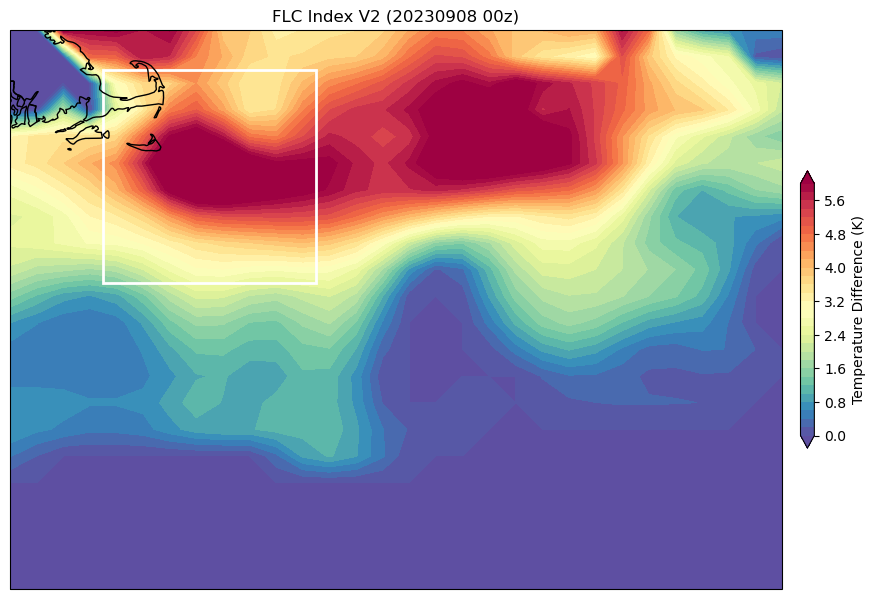

In [7]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
levels = np.linspace(0, 6, 31)

c=ax.contourf(ds.longitude, ds.latitude, FLC_index_masked, cmap=cmap, extend='both', levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('FLC Index V2 ('+date+' '+ time+')')
clb.set_label('Temperature Difference (K)')
ax.add_patch(roi_box)

ax.add_feature(cfeature.STATES)

In [8]:
result_df = pd.DataFrame(columns=['Datetime', 'Total_FLC'])

nc_files = sorted(glob.glob(dataset_path+'*.nc'))
for file_path in nc_files:
    #print(file_path[18:29])
    dataset = xr.open_dataset(file_path)
    
    #--- Cropped to the region of interest
    dataset = dataset.sel(latitude=slice(roi_lat1,roi_lat2), longitude=slice(roi_lon1+360,roi_lon2+360))
   
    #--- Using the total FLC index (neg and pos)
    #total_flc = dataset.FLC_index_V2.sum().values
    
    #--- Using only the positive FLC index
    FLC_index_masked = dataset.FLC_index_V2.where(dataset.FLC_index_V2 >= 0, 0)
    total_flc = FLC_index_masked.sum().values
    
    dt = datetime.strptime(file_path[18:29], "%Y%m%d_%H")
    
    result_df = result_df.append({'Datetime': dt, 'Total_FLC': total_flc}, ignore_index=True)

In [9]:
dt1 = datetime(2023, 9, 17, 0, 0, 0)
dt2 = datetime(2023, 9, 9, 0, 0, 0)
dt3 = datetime(2023, 9, 2, 0, 0, 0)
dt4 = datetime(2023, 8, 26, 0, 0, 0)
dt5 = datetime(2023, 8, 18, 0, 0, 0)
dt6 = datetime(2023, 8, 11, 0, 0, 0)
dt7 = datetime(2023, 8, 4, 0, 0, 0)
dt8 = datetime(2023, 7, 27, 0, 0, 0)
dt9 = datetime(2023, 7, 19, 0, 0, 0)
dt10 = datetime(2023, 7, 13, 0, 0, 0)
dt11 = datetime(2023, 7, 5, 0, 0, 0)
dt12 = datetime(2023, 6, 27, 0, 0, 0)
dt13 = datetime(2023, 6, 19, 0, 0, 0)
dt14 = datetime(2023, 6, 13, 0, 0, 0)
dt15 = datetime(2023, 6, 6, 0, 0, 0)
dt16 = datetime(2023, 5, 28, 0, 0, 0)

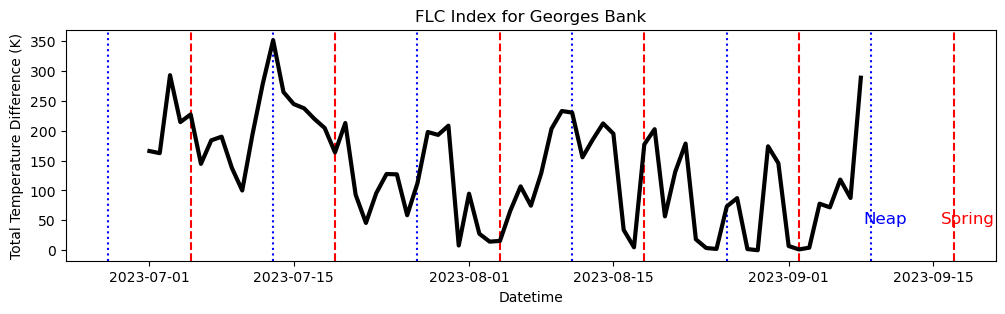

In [10]:
fig,ax=plt.subplots(1, figsize=(12,3))
ax.set_ylabel("Total Temperature Difference (K)")
ax.set_xlabel("Datetime")
ax.set_title("FLC Index for Georges Bank")

ax.axvline(x=dt1, color='r', linestyle='--', label='Spring')
ax.annotate('Spring', (dt1, 22), textcoords='offset points', xytext=(10,10), ha='center', fontsize=12, color='r')
ax.axvline(x=dt3, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt5, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt7, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt9, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt11, color='r', linestyle='--', label='Spring')

ax.axvline(x=dt2, color='b', linestyle=':', label='Neap')
ax.annotate('Neap', (dt2, 22), textcoords='offset points', xytext=(10,10), ha='center', fontsize=12, color='b')
ax.axvline(x=dt4, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt6, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt8, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt10, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt12, color='b', linestyle=':', label='Spring')

ax.plot(result_df.Datetime, result_df.Total_FLC, c='black', linewidth=3)


### Using only SST data

In [11]:
sst_path = "SST_data/"

In [12]:
ds = xr.open_dataset("SST_data/oisst-avhrr-v02r01.20230702.nc")

In [13]:
#--- Filter to the Georges Bank region
min_lon = -71.5
min_lat = 37
max_lon = -64
max_lat = 42.5

ds = ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon+360,max_lon+360))

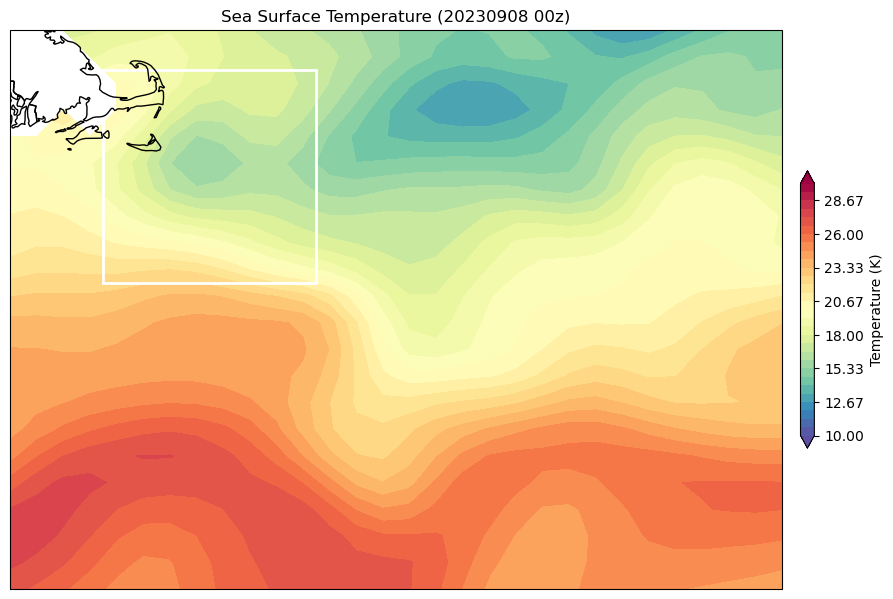

In [14]:
roi_box = mpatches.Rectangle(
    xy=(roi_lon1, roi_lat1),
    width=roi_lon2 - roi_lon1,
    height=roi_lat2 - roi_lat1,
    fill=False,  # Set to True if you want a filled rectangle
    edgecolor='white',  # Customize the box color
    linewidth=2.0,    # Customize the line width
    transform=ccrs.PlateCarree()  # Specify the coordinate reference system
)

projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
levels = np.linspace(10, 30, 31)

c=ax.contourf(ds.lon, ds.lat, ds.sst[0][0], cmap=cmap, extend='both', levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('Sea Surface Temperature ('+date+' '+ time+')')
clb.set_label('Temperature (K)')
ax.add_patch(roi_box)

ax.add_feature(cfeature.STATES)

In [15]:
sst_result_df = pd.DataFrame(columns=['Datetime', 'Total_SST'])

nc_files = sorted(glob.glob(sst_path+'*.nc'))
for file_path in nc_files:
    #print(file_path[28:36])
    dataset = xr.open_dataset(file_path)
    
    #--- Cropped to the region of interest
    dataset = dataset.sel(lat=slice(roi_lat1,roi_lat2), lon=slice(roi_lon1+360,roi_lon2+360))
   
    #--- Using the total SST
    total_sst = dataset.sst.sum().values
    
    dt = datetime.strptime(file_path[28:36], "%Y%m%d")
    
    sst_result_df = sst_result_df.append({'Datetime': dt, 'Total_SST': total_sst}, ignore_index=True)

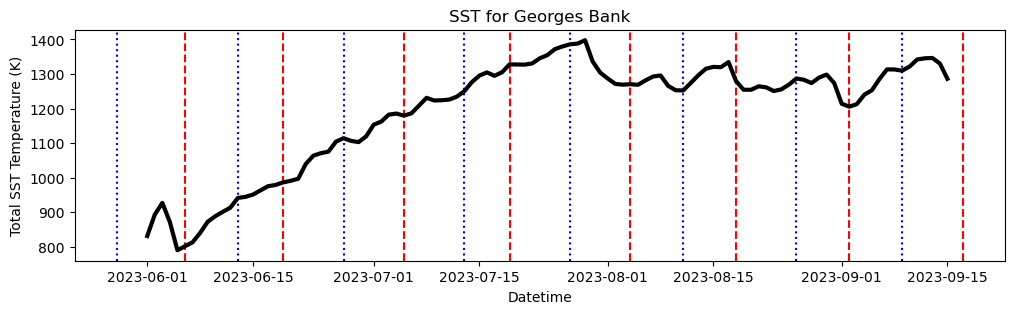

In [16]:
fig,ax=plt.subplots(1, figsize=(12,3))
ax.set_ylabel("Total SST Temperature (K)")
ax.set_xlabel("Datetime")
ax.set_title("SST for Georges Bank")

ax.axvline(x=dt1, color='r', linestyle='--', label='Spring')
ax.annotate('Spring', (dt1, 22), textcoords='offset points', xytext=(10,10), ha='center', fontsize=12, color='r')
ax.axvline(x=dt3, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt5, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt7, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt9, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt11, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt13, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt15, color='r', linestyle='--', label='Spring')

ax.axvline(x=dt2, color='b', linestyle=':', label='Neap')
ax.annotate('Neap', (dt2, 22), textcoords='offset points', xytext=(10,10), ha='center', fontsize=12, color='b')
ax.axvline(x=dt4, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt6, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt8, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt10, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt12, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt14, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt16, color='b', linestyle=':', label='Spring')

ax.plot(sst_result_df.Datetime, sst_result_df.Total_SST, c='black', linewidth=3)


Calculate the SST anomaly

In [17]:
mean = sst_result_df.Total_SST.mean()
std_dev = sst_result_df.Total_SST.std()

# Calculate Z-scores for each data point
sst_result_df['Z_Score'] = (sst_result_df.Total_SST - mean) / std_dev

# Calculate anomaly for each data point
sst_result_df['Anomaly'] = sst_result_df.Total_SST - mean

# Set a threshold (e.g., 2 standard deviations)
#threshold = 1

# Identify anomalies based on the threshold
#anomalies = sst_result_df[abs(sst_result_df['Z-Score']) > threshold]

In [32]:
sst_result_df

,Datetime,Total_SST,Z_Score,Anomaly
0,2023-06-01,831.48,-2.254141,-360.622896
1,2023-06-02,893.48,-1.866599,-298.622896
2,2023-06-03,927.18994,-1.655888,-264.912935
3,2023-06-04,871.75,-2.002426,-320.352877
4,2023-06-05,790.36,-2.51117,-401.742891
...,...,...,...,...
102,2023-09-11,1342.0698,0.937397,149.966947
103,2023-09-12,1345.3599,0.957962,153.256987
104,2023-09-13,1346.35,0.964151,154.247099
105,2023-09-14,1330.51,0.86514,138.407133


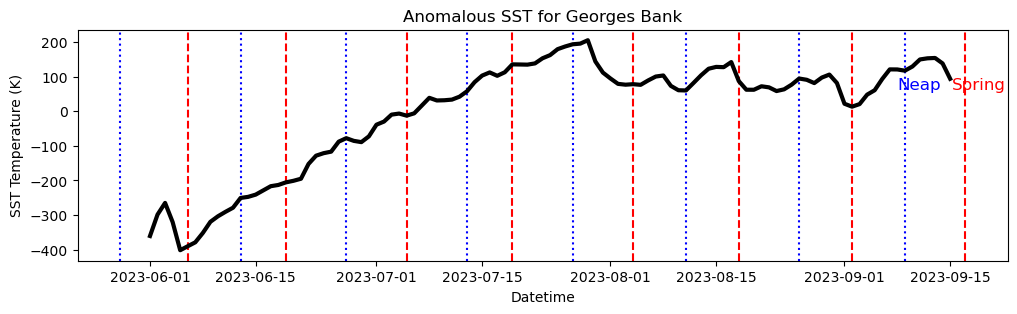

In [34]:
fig,ax=plt.subplots(1, figsize=(12,3))
ax.set_ylabel("SST Temperature (K)")
ax.set_xlabel("Datetime")
ax.set_title("Anomalous SST for Georges Bank")

ax.axvline(x=dt1, color='r', linestyle='--', label='Spring')
ax.annotate('Spring', (dt1, 22), textcoords='offset points', xytext=(10,10), ha='center', fontsize=12, color='r')
ax.axvline(x=dt3, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt5, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt7, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt9, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt11, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt13, color='r', linestyle='--', label='Spring')
ax.axvline(x=dt15, color='r', linestyle='--', label='Spring')

ax.axvline(x=dt2, color='b', linestyle=':', label='Neap')
ax.annotate('Neap', (dt2, 22), textcoords='offset points', xytext=(10,10), ha='center', fontsize=12, color='b')
ax.axvline(x=dt4, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt6, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt8, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt10, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt12, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt14, color='b', linestyle=':', label='Spring')
ax.axvline(x=dt16, color='b', linestyle=':', label='Spring')

ax.plot(sst_result_df.Datetime, sst_result_df.Anomaly, c='black', linewidth=3)